In [31]:
import matplotlib.pyplot as plt
import pandas

In [32]:
import yfinance as yf

symbol = 'FB'
FB = yf.Ticker(symbol).history(period="1mo")
FB.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-09,231.52,239.77,230.41,238.67,27462900,0,0
2020-06-10,240.96,241.21,235.28,236.73,20720700,0,0
2020-06-11,229.94,232.89,223.55,224.43,26708200,0,0
2020-06-12,229.90,231.66,224.50,228.58,22071700,0,0
2020-06-15,225.09,230.30,224.80,229.29,7904241,0,0


In [33]:
symbol = '^GSPC' #s&p500
SPY = yf.Ticker(symbol).history(period="1mo")
SPY.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-09,3213.32,3222.71,3193.11,3207.18,6382620000,0,0
2020-06-10,3213.42,3223.27,3181.49,3190.14,6570840000,0,0
2020-06-11,3123.53,3123.53,2999.49,3002.10,7018890000,0,0
2020-06-12,3071.04,3088.42,2984.47,3041.31,5832250000,0,0
2020-06-15,2993.76,3041.47,2965.66,3039.30,1528923592,0,0


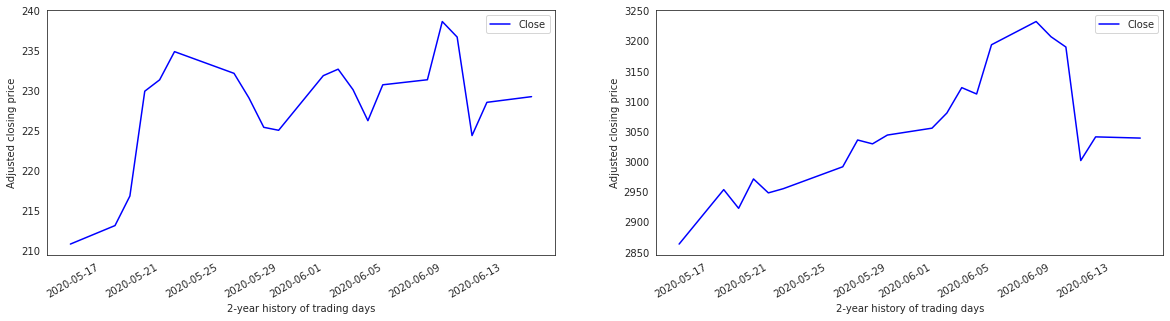

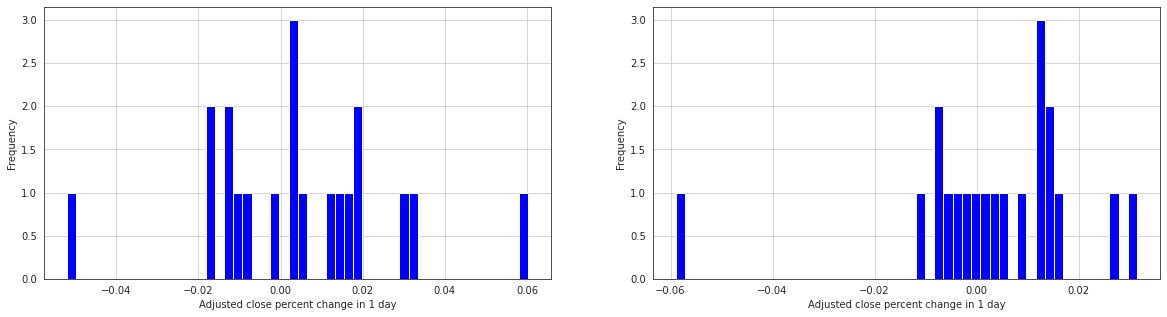

In [34]:
# PRELIMINARY PLOTS

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

df_list = [FB,SPY]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
for index, ax in enumerate(ax):    
    df_list[index]['Close'].plot(label='Close', color='b', legend=True, ax=ax)
    ax.set_xlabel('2-year history of trading days')
    ax.set_ylabel('Adjusted closing price')

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
for index, ax in enumerate(ax): 
    df_list[index]['Close'].pct_change().hist(bins=50, color = 'b', ax=ax)
    ax.set_xlabel('Adjusted close percent change in 1 day')
    ax.set_ylabel('Frequency')   

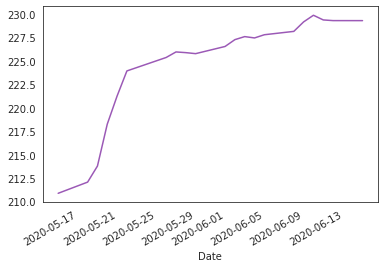

In [35]:
import numpy

FB['Close'].ewm(14).mean().plot()

In [36]:
def EWMA(stock_list, days_list, name_list):
    from itertools import cycle
    color = cycle('grc')

    for index,stock in enumerate(stock_list):
        fig, ax = plt.subplots(figsize=(20,6))
        stock['Close'].plot(title = name_list[index], label= 'Close', color='b', legend=True, ax=ax)    
        for day in days_list:    
            stock['Close'].ewm(com=day).mean().plot(label= 'ewma_' + str(day) + 'day', color= next(color), legend=True, ax=ax)
            ax.set_xlabel('trading days')
            ax.set_ylabel('price')     

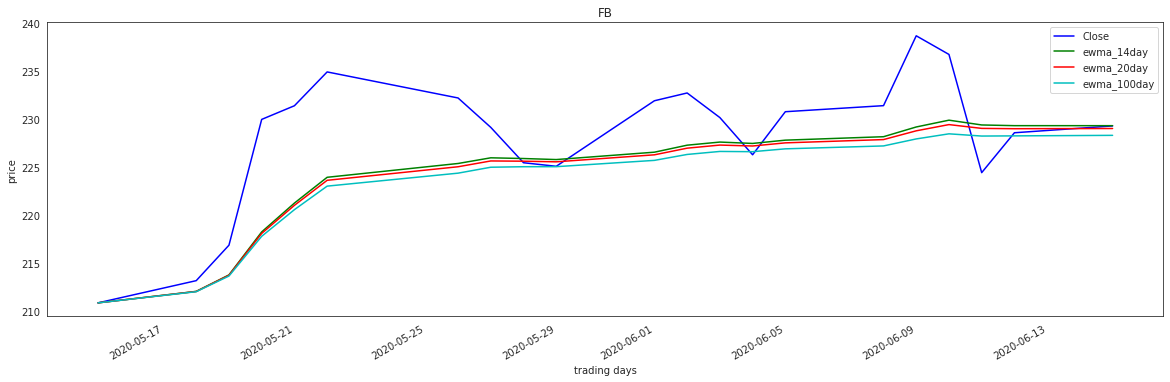

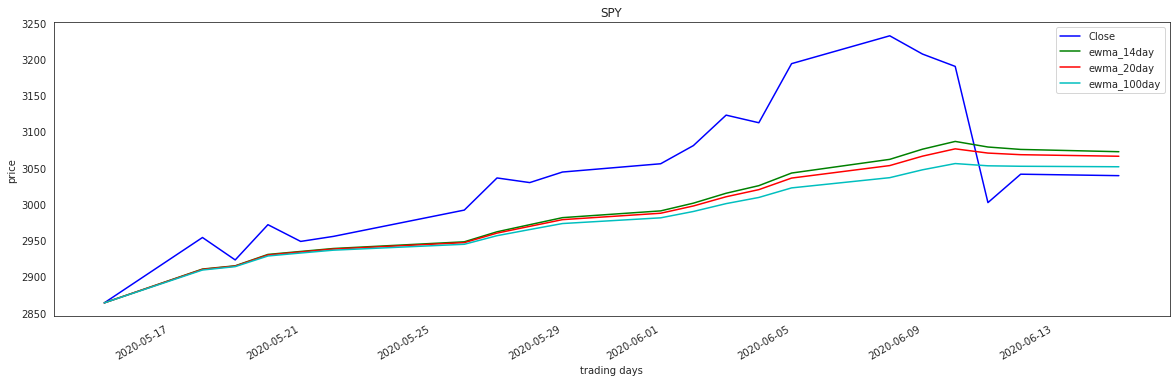

In [37]:
# call the funtion by passing stocks,their names and days ewma required          
EWMA(stock_list = [FB,SPY], name_list = ['FB','SPY'], days_list = [14,20,100]) 

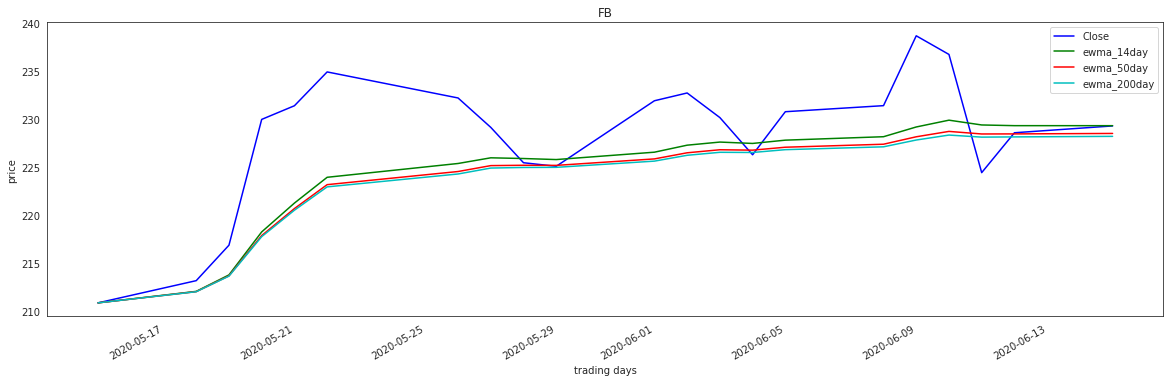

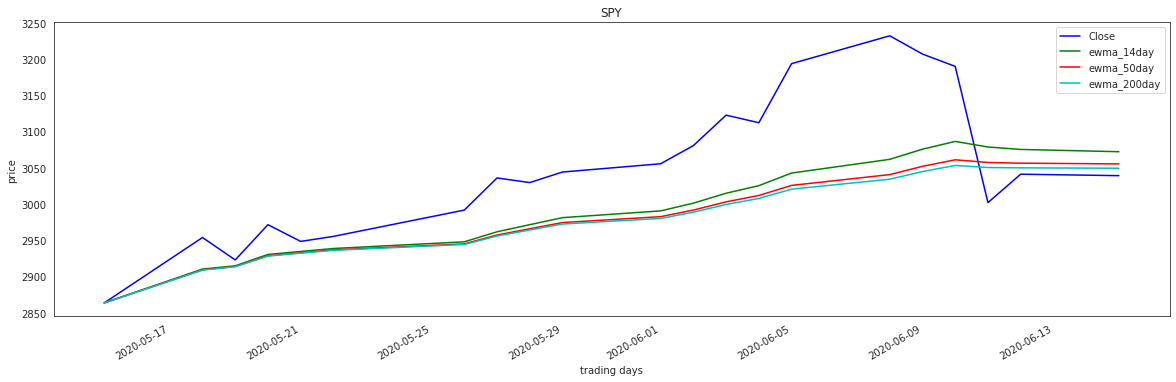

In [38]:
EWMA(stock_list = [FB,SPY], name_list = ['FB','SPY'],days_list = [14,50,200])  

In [39]:
#Relative strength and Relative Strength Index
def RSI(stock, column="Close", period=14):
    # Wilder's RSI
    close = stock[column]
    delta = close.diff() 
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0
    
    # Calculate the exponential moving averages (EWMA)
    roll_up = up.ewm(com=period - 1, adjust=False).mean()
    roll_down = down.ewm(com=period - 1, adjust=False).mean().abs()
    
    # Calculate RS based on exponential moving average (EWMA)
    rs = roll_up / roll_down   # relative strength =  average gain/average loss

    rsi = 100-(100/(1+rs))
    stock['RSI'] = rsi
    
    return stock

In [40]:
RSI(FB).head(15)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2020-05-15,205.27,211.34,204.12,210.88,19383200,0,0,NaN
2020-05-18,212.15,214.64,210.94,213.19,20167400,0,0,100.000000
2020-05-19,213.27,220.49,212.83,216.88,31843200,0,0,100.000000
2020-05-20,223.50,231.34,223.19,229.97,50162900,0,0,100.000000
2020-05-21,234.72,237.20,231.20,231.39,47782600,0,0,100.000000
2020-05-22,231.51,235.99,228.74,234.91,33925600,0,0,100.000000
2020-05-26,239.77,240.90,231.67,232.20,33178300,0,0,93.661297
2020-05-27,229.07,230.56,221.13,229.14,34697600,0,0,86.958598
2020-05-28,224.30,231.63,224.00,225.46,29377200,0,0,79.582632


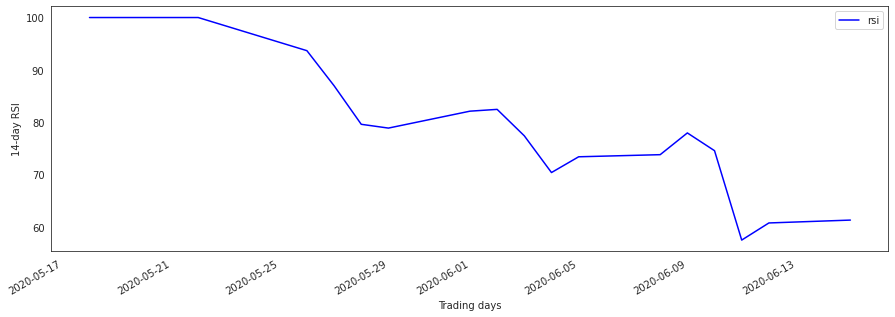

In [41]:
fig,ax=plt.subplots(figsize=(15,5))
FB.RSI.plot(ax=ax, label='rsi', legend=True, color='b');
ax.set_xlabel('Trading days'); ax.set_ylabel('14-day RSI');